In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from math import sqrt

In [79]:
data = pd.read_csv("C:/Users/santo/Downloads/data_51_101.csv")

In [80]:
data

,node/id,node/onGcc,node/instaVerified,node/isBlackListed,node/name,node/email,node/socialHandles/0/id,node/socialHandles/0/platform,node/socialHandles/0/handle,node/socialHandles/0/url,...,node/__typename,__typename,node/creatorPrograms/0/id,node/creatorPrograms/0/tag,node/creatorPrograms/0/level,node/creatorPrograms/0/__typename,node/creatorPrograms/1/id,node/creatorPrograms/1/tag,node/creatorPrograms/1/level,node/creatorPrograms/1/__typename
0,IG_316056,False,False,False,camila,NaN,IG_316056,INSTAGRAM,camila_cabello,https://www.instagram.com/camila_cabello,...,Influencer,InfluencerEdge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IG_291408,False,False,False,BTS official,NaN,IG_291408,INSTAGRAM,bts.bighitofficial,https://www.instagram.com/bts.bighitofficial,...,Influencer,InfluencerEdge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IG_294144,False,False,False,Raffi Ahmad and Nagita Slavina,NaN,IG_294144,INSTAGRAM,raffinagita1717,https://www.instagram.com/raffinagita1717,...,Influencer,InfluencerEdge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IG_316618,False,False,False,JISOO🤍,NaN,IG_316618,INSTAGRAM,sooyaaa__,https://www.instagram.com/sooyaaa__,...,Influencer,InfluencerEdge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IG_117707,False,False,False,Will Smith,NaN,IG_117707,INSTAGRAM,willsmith,https://www.instagram.com/willsmith,...,Influencer,InfluencerEdge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,IG_2357,True,False,False,Akshay Kumar,NaN,IG_2357,INSTAGRAM,akshaykumar,https://www.instagram.com/akshaykumar,...,Influencer,InfluencerEdge,1.0,BEAUTY,CREATOR,CreatorProgram,3.0,GOOD_LIFE,CREATOR,CreatorProgram
6,IG_316622,False,False,False,MALUMA,NaN,IG_316622,INSTAGRAM,maluma,https://www.instagram.com/maluma,...,Influencer,InfluencerEdge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,IG_90324,False,False,False,Jacqueline Fernandez,NaN,IG_90324,INSTAGRAM,jacquelinef143,https://www.instagram.com/jacquelinef143,...,Influencer,InfluencerEdge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,IG_330116,False,False,False,Anitta 🎤,NaN,IG_330116,INSTAGRAM,anitta,https://www.instagram.com/anitta,...,Influencer,InfluencerEdge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,IG_316972,False,False,False,ROSÉ,NaN,IG_316972,INSTAGRAM,roses_are_rosie,https://www.instagram.com/roses_are_rosie,...,Influencer,InfluencerEdge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
data1 = pd.read_csv("C:/Users/santo/Downloads/data_101_151.csv")

In [82]:
data1

,node/id,node/onGcc,node/instaVerified,node/isBlackListed,node/name,node/email,node/socialHandles/0/id,node/socialHandles/0/platform,node/socialHandles/0/handle,node/socialHandles/0/url,...,node/commercials/5/format,node/commercials/5/__typename,node/creatorPrograms/0/id,node/creatorPrograms/0/tag,node/creatorPrograms/0/level,node/creatorPrograms/0/__typename,node/creatorPrograms/1/id,node/creatorPrograms/1/tag,node/creatorPrograms/1/level,node/creatorPrograms/1/__typename
0,IG_268779,False,False,False,gucci,NaN,IG_268779,INSTAGRAM,gucci,https://www.instagram.com/gucci,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IG_70794,False,False,False,DOVE,NaN,IG_70794,INSTAGRAM,dovecameron,https://www.instagram.com/dovecameron,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IG_268653,False,False,False,Nusr_et#Saltbae,NaN,IG_268653,INSTAGRAM,nusr_et,https://www.instagram.com/nusr_et,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IG_72269,True,False,False,B,bhaskar.saraogi@bulbul.tv,IG_72269,INSTAGRAM,haileybieber,https://www.instagram.com/haileybieber,...,Video,InfluencerCommercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IG_329247,False,False,False,Larissa Manoela,NaN,IG_329247,INSTAGRAM,larissamanoela,https://www.instagram.com/larissamanoela,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,IG_121443,False,False,False,🔮Vanessa Hudgens🔮,NaN,IG_121443,INSTAGRAM,vanessahudgens,https://www.instagram.com/vanessahudgens,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,IG_61302,False,False,False,Zayn Malik,NaN,IG_61302,INSTAGRAM,zayn,https://www.instagram.com/zayn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,IG_268346,False,False,False,5-Minute Crafts,NaN,IG_268346,INSTAGRAM,5.min.crafts,https://www.instagram.com/5.min.crafts,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,IG_76799,False,False,False,flame,NaN,IG_76799,INSTAGRAM,travisscott,https://www.instagram.com/travisscott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,IG_566955,False,False,False,Sergio Ramos,NaN,IG_566955,INSTAGRAM,sergioramos,https://www.instagram.com/sergioramos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
data2 = pd.read_csv("C:/Users/santo/Downloads/data_151_201.csv")

In [84]:
data2

,node/id,node/onGcc,node/instaVerified,node/isBlackListed,node/name,node/email,node/socialHandles/0/id,node/socialHandles/0/platform,node/socialHandles/0/handle,node/socialHandles/0/url,...,node/isPlixxoUser,node/profileImage/url,node/profileImage/__typename,node/whatsappNumber,node/whatsappOptin,node/creatorPrograms,node/phone,node/comment,node/__typename,__typename
0,IG_329246,False,False,False,Virginia Fonseca Costa,NaN,IG_329246,INSTAGRAM,virginia,https://www.instagram.com/virginia,...,False,https://winkl-production.s3.amazonaws.com/Inst...,Asset,NaN,False,NaN,NaN,NaN,Influencer,InfluencerEdge
1,IG_261984,False,False,False,Ed Sheeran,NaN,IG_261984,INSTAGRAM,teddysphotos,https://www.instagram.com/teddysphotos,...,False,https://winkl-production.s3.amazonaws.com/Inst...,Asset,NaN,False,NaN,NaN,NaN,Influencer,InfluencerEdge
2,IG_117995,False,False,False,chrissy teigen,NaN,IG_117995,INSTAGRAM,chrissyteigen,https://www.instagram.com/chrissyteigen,...,False,https://cdn.vidooly.com/images/instagram/profi...,Asset,NaN,False,NaN,NaN,NaN,Influencer,InfluencerEdge
3,IG_125697,False,False,False,Georgina Rodríguez,NaN,IG_125697,INSTAGRAM,georginagio,https://www.instagram.com/georginagio,...,False,https://cdn.vidooly.com/images/instagram/profi...,Asset,NaN,False,NaN,NaN,NaN,Influencer,InfluencerEdge
4,IG_280231,False,False,False,SYAHRINI,NaN,IG_280231,INSTAGRAM,princessyahrini,https://www.instagram.com/princessyahrini,...,False,https://winkl-production.s3.amazonaws.com/Inst...,Asset,NaN,False,NaN,NaN,NaN,Influencer,InfluencerEdge
5,IG_40319,False,False,False,Anushka Sen,NaN,IG_40319,INSTAGRAM,anushkasen0408,https://www.instagram.com/anushkasen0408,...,False,https://cdn.vidooly.com/images/instagram/profi...,Asset,NaN,False,NaN,NaN,NaN,Influencer,InfluencerEdge
6,IG_947212,False,False,False,SUGA of BTS 민윤기,NaN,IG_947212,INSTAGRAM,agustd,https://www.instagram.com/agustd,...,False,https://winkl-production.s3.amazonaws.com/Inst...,Asset,NaN,False,NaN,NaN,NaN,Influencer,InfluencerEdge
7,IG_947216,False,False,False,RM,NaN,IG_947216,INSTAGRAM,rkive,https://www.instagram.com/rkive,...,False,https://winkl-production.s3.amazonaws.com/Inst...,Asset,NaN,False,NaN,NaN,NaN,Influencer,InfluencerEdge
8,IG_127075,False,False,False,Parineeti Chopra,NaN,IG_127075,INSTAGRAM,parineetichopra,https://www.instagram.com/parineetichopra,...,False,https://cdn.vidooly.com/images/instagram/profi...,Asset,NaN,False,NaN,NaN,NaN,Influencer,InfluencerEdge
9,IG_224883,False,False,False,Marvel Studios,NaN,IG_224883,INSTAGRAM,marvelstudios,https://www.instagram.com/marvelstudios,...,False,https://winkl-production.s3.amazonaws.com/Inst...,Asset,NaN,False,NaN,NaN,NaN,Influencer,InfluencerEdge


In [85]:
print(data.shape)
print(data1.shape)
print(data2.shape)

(50, 49)
(50, 85)
(50, 41)


In [86]:
data.columns

Index(['node/id', 'node/onGcc', 'node/instaVerified', 'node/isBlackListed',
       'node/name', 'node/email', 'node/socialHandles/0/id',
       'node/socialHandles/0/platform', 'node/socialHandles/0/handle',
       'node/socialHandles/0/url', 'node/socialHandles/0/metrics/followers',
       'node/socialHandles/0/metrics/following',
       'node/socialHandles/0/metrics/avgEngagement',
       'node/socialHandles/0/metrics/avgLikes',
       'node/socialHandles/0/metrics/avgComments',
       'node/socialHandles/0/metrics/numOfPosts',
       'node/socialHandles/0/metrics/avgVideoViews',
       'node/socialHandles/0/metrics/subscribers',
       'node/socialHandles/0/metrics/totalVideos',
       'node/socialHandles/0/metrics/avgReach',
       'node/socialHandles/0/metrics/totalViews',
       'node/socialHandles/0/metrics/__typename',
       'node/socialHandles/0/__typename', 'node/gender', 'node/label',
       'node/country', 'node/state', 'node/city', 'node/bio', 'node/dob',
       'node/bar

In [87]:
data1.columns

Index(['node/id', 'node/onGcc', 'node/instaVerified', 'node/isBlackListed',
       'node/name', 'node/email', 'node/socialHandles/0/id',
       'node/socialHandles/0/platform', 'node/socialHandles/0/handle',
       'node/socialHandles/0/url', 'node/socialHandles/0/metrics/followers',
       'node/socialHandles/0/metrics/following',
       'node/socialHandles/0/metrics/avgEngagement',
       'node/socialHandles/0/metrics/avgLikes',
       'node/socialHandles/0/metrics/avgComments',
       'node/socialHandles/0/metrics/numOfPosts',
       'node/socialHandles/0/metrics/avgVideoViews',
       'node/socialHandles/0/metrics/subscribers',
       'node/socialHandles/0/metrics/totalVideos',
       'node/socialHandles/0/metrics/avgReach',
       'node/socialHandles/0/metrics/totalViews',
       'node/socialHandles/0/metrics/__typename',
       'node/socialHandles/0/__typename', 'node/gender', 'node/label',
       'node/country', 'node/state', 'node/city', 'node/bio', 'node/dob',
       'node/bar

In [88]:
data2.columns

Index(['node/id', 'node/onGcc', 'node/instaVerified', 'node/isBlackListed',
       'node/name', 'node/email', 'node/socialHandles/0/id',
       'node/socialHandles/0/platform', 'node/socialHandles/0/handle',
       'node/socialHandles/0/url', 'node/socialHandles/0/metrics/followers',
       'node/socialHandles/0/metrics/following',
       'node/socialHandles/0/metrics/avgEngagement',
       'node/socialHandles/0/metrics/avgLikes',
       'node/socialHandles/0/metrics/avgComments',
       'node/socialHandles/0/metrics/numOfPosts',
       'node/socialHandles/0/metrics/avgVideoViews',
       'node/socialHandles/0/metrics/subscribers',
       'node/socialHandles/0/metrics/totalVideos',
       'node/socialHandles/0/metrics/avgReach',
       'node/socialHandles/0/metrics/totalViews',
       'node/socialHandles/0/metrics/__typename',
       'node/socialHandles/0/__typename', 'node/gender', 'node/label',
       'node/country', 'node/state', 'node/city', 'node/bio', 'node/dob',
       'node/bar

In [89]:
frames = [data, data1, data2]

In [90]:
newdata = pd.concat(frames)

In [91]:
newdata

,node/id,node/onGcc,node/instaVerified,node/isBlackListed,node/name,node/email,node/socialHandles/0/id,node/socialHandles/0/platform,node/socialHandles/0/handle,node/socialHandles/0/url,...,node/commercials/3/__typename,node/commercials/4/id,node/commercials/4/price,node/commercials/4/format,node/commercials/4/__typename,node/commercials/5/id,node/commercials/5/price,node/commercials/5/format,node/commercials/5/__typename,node/creatorPrograms
0,IG_316056,False,False,False,camila,NaN,IG_316056,INSTAGRAM,camila_cabello,https://www.instagram.com/camila_cabello,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IG_291408,False,False,False,BTS official,NaN,IG_291408,INSTAGRAM,bts.bighitofficial,https://www.instagram.com/bts.bighitofficial,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IG_294144,False,False,False,Raffi Ahmad and Nagita Slavina,NaN,IG_294144,INSTAGRAM,raffinagita1717,https://www.instagram.com/raffinagita1717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IG_316618,False,False,False,JISOO🤍,NaN,IG_316618,INSTAGRAM,sooyaaa__,https://www.instagram.com/sooyaaa__,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IG_117707,False,False,False,Will Smith,NaN,IG_117707,INSTAGRAM,willsmith,https://www.instagram.com/willsmith,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,IG_513230,False,False,False,BMW,NaN,IG_513230,INSTAGRAM,bmw,https://www.instagram.com/bmw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,IG_268841,False,False,False,Dan Bilzerian,NaN,IG_268841,INSTAGRAM,danbilzerian,https://www.instagram.com/danbilzerian,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,IG_16034,False,False,False,Sonam Kapoor Ahuja,NaN,IG_16034,INSTAGRAM,sonamkapoor,https://www.instagram.com/sonamkapoor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,IG_490450,False,False,False,Juliette,NaN,IG_490450,INSTAGRAM,juliette,https://www.instagram.com/juliette,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
newdata.shape

(150, 86)

In [93]:
newdata.to_csv("newinstagramdata.csv", index=False)

In [94]:
df = pd.read_csv("C:/Users/santo/Documents/newinstagramdata.csv")
df.head()

,id,onGcc,instaVerified,isBlackListed,name,email,platform,handle,url,followers,...,avgLikes,avgComments,numOfPosts,avgVideoViews,avgReach,label,barterAllowed,isPlixxoUser,profilepicture,price
0,IG_316056,False,False,False,camila,NaN,INSTAGRAM,camila_cabello,https://www.instagram.com/camila_cabello,33343771,...,755833.75,3201.63,2901.0,NaN,3958736.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
1,IG_291408,False,False,False,BTS official,NaN,INSTAGRAM,bts.bighitofficial,https://www.instagram.com/bts.bighitofficial,33359683,...,2567624.86,15678.57,1041.0,NaN,13495868.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,230000
2,IG_294144,False,False,False,Raffi Ahmad and Nagita Slavina,NaN,INSTAGRAM,raffinagita1717,https://www.instagram.com/raffinagita1717,33361889,...,136905.96,875.75,9861.0,NaN,2497582.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,230000
3,IG_316618,False,False,False,JISOO🤍,NaN,INSTAGRAM,sooyaaa__,https://www.instagram.com/sooyaaa__,33441791,...,4509301.88,42542.00,856.0,NaN,23615715.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
4,IG_117707,False,False,False,Will Smith,NaN,INSTAGRAM,willsmith,https://www.instagram.com/willsmith,33450698,...,2580852.89,29533.61,1367.0,NaN,60444668.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000


In [95]:
df.sort_values(by=['followers','following','numOfPosts','avgLikes'], ascending=False)

,id,onGcc,instaVerified,isBlackListed,name,email,platform,handle,url,followers,...,avgLikes,avgComments,numOfPosts,avgVideoViews,avgReach,label,barterAllowed,isPlixxoUser,profilepicture,price
149,IG_599587,False,False,False,Sara Ali Khan,NaN,INSTAGRAM,saraalikhan95reels,https://www.instagram.com/saraalikhan95reels,65163852,...,822574.13,3504.00,627.0,NaN,5586672.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000
148,IG_490450,False,False,False,Juliette,NaN,INSTAGRAM,juliette,https://www.instagram.com/juliette,65122707,...,307225.21,9109.86,1044.0,NaN,3401302.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000
147,IG_16034,False,False,False,Sonam Kapoor Ahuja,NaN,INSTAGRAM,sonamkapoor,https://www.instagram.com/sonamkapoor,63972386,...,178814.11,900.82,4812.0,NaN,4303510.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,490000
146,IG_268841,False,False,False,Dan Bilzerian,NaN,INSTAGRAM,danbilzerian,https://www.instagram.com/danbilzerian,63863628,...,2099889.90,12678.70,1373.0,NaN,31090458.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000
145,IG_513230,False,False,False,BMW,NaN,INSTAGRAM,bmw,https://www.instagram.com/bmw,63826245,...,80322.89,365.75,9164.0,NaN,800888.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,IG_117707,False,False,False,Will Smith,NaN,INSTAGRAM,willsmith,https://www.instagram.com/willsmith,33450698,...,2580852.89,29533.61,1367.0,NaN,60444668.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
3,IG_316618,False,False,False,JISOO🤍,NaN,INSTAGRAM,sooyaaa__,https://www.instagram.com/sooyaaa__,33441791,...,4509301.88,42542.00,856.0,NaN,23615715.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
2,IG_294144,False,False,False,Raffi Ahmad and Nagita Slavina,NaN,INSTAGRAM,raffinagita1717,https://www.instagram.com/raffinagita1717,33361889,...,136905.96,875.75,9861.0,NaN,2497582.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,230000
1,IG_291408,False,False,False,BTS official,NaN,INSTAGRAM,bts.bighitofficial,https://www.instagram.com/bts.bighitofficial,33359683,...,2567624.86,15678.57,1041.0,NaN,13495868.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,230000


In [96]:
df["instaVerified"].value_counts()

False    150
Name: instaVerified, dtype: int64

<AxesSubplot:xlabel='price', ylabel='followers'>

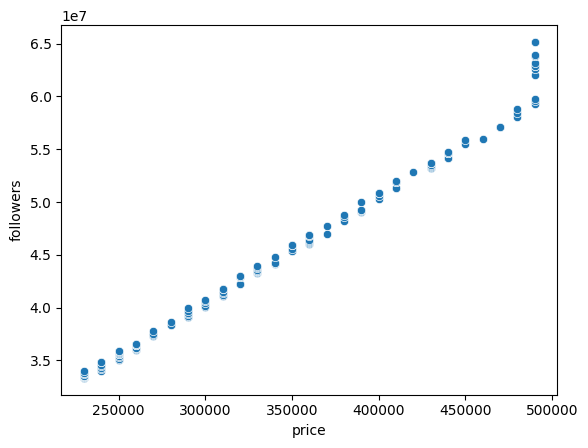

In [97]:
sns.scatterplot(data=df, x = 'price', y = 'followers')

<AxesSubplot:xlabel='followers', ylabel='Count'>

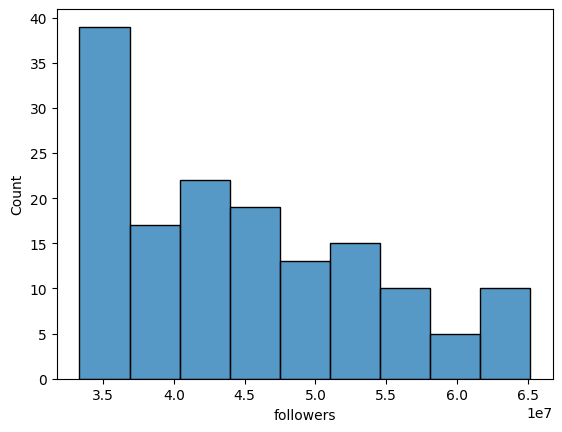

In [98]:
sns.histplot(data=df, x="followers")

In [99]:
df.columns

Index(['id', 'onGcc', 'instaVerified', 'isBlackListed', 'name', 'email',
       'platform', 'handle', 'url', 'followers', 'following', 'avgEngagement',
       'avgLikes', 'avgComments', 'numOfPosts', 'avgVideoViews', 'avgReach',
       'label', 'barterAllowed', 'isPlixxoUser', 'profilepicture', 'price'],
      dtype='object')

<AxesSubplot:xlabel='following', ylabel='Count'>

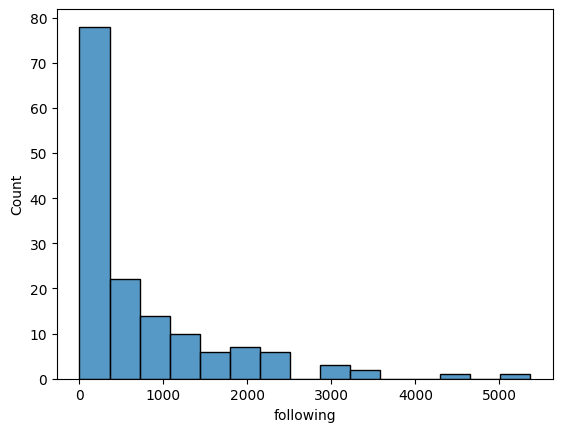

In [100]:
sns.histplot(data=df, x="following")

<AxesSubplot:xlabel='avgLikes', ylabel='Count'>

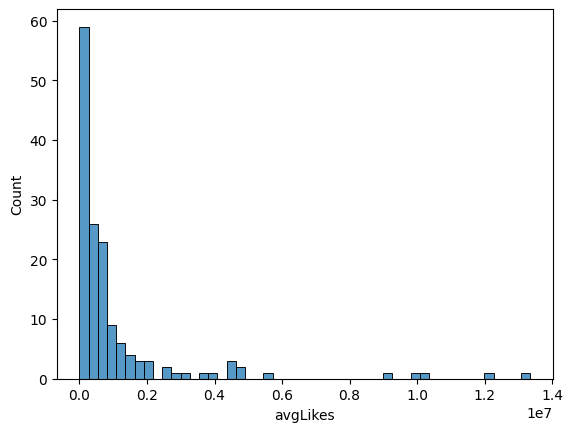

In [101]:
sns.histplot(data=df, x="avgLikes")

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              150 non-null    object 
 1   onGcc           150 non-null    bool   
 2   instaVerified   150 non-null    bool   
 3   isBlackListed   150 non-null    bool   
 4   name            150 non-null    object 
 5   email           4 non-null      object 
 6   platform        150 non-null    object 
 7   handle          150 non-null    object 
 8   url             150 non-null    object 
 9   followers       150 non-null    int64  
 10  following       150 non-null    int64  
 11  avgEngagement   150 non-null    float64
 12  avgLikes        150 non-null    float64
 13  avgComments     149 non-null    float64
 14  numOfPosts      149 non-null    float64
 15  avgVideoViews   0 non-null      float64
 16  avgReach        148 non-null    float64
 17  label           150 non-null    obj

In [103]:
df.isnull().sum()

id                  0
onGcc               0
instaVerified       0
isBlackListed       0
name                0
email             146
platform            0
handle              0
url                 0
followers           0
following           0
avgEngagement       0
avgLikes            0
avgComments         1
numOfPosts          1
avgVideoViews     150
avgReach            2
label               0
barterAllowed       0
isPlixxoUser        0
profilepicture      0
price               0
dtype: int64

In [104]:
df["email"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
145    NaN
146    NaN
147    NaN
148    NaN
149    NaN
Name: email, Length: 150, dtype: object

In [105]:
df['avgVideoViews']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
Name: avgVideoViews, Length: 150, dtype: float64

In [106]:
df.drop(["avgVideoViews", "email"], axis = 1, inplace=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              150 non-null    object 
 1   onGcc           150 non-null    bool   
 2   instaVerified   150 non-null    bool   
 3   isBlackListed   150 non-null    bool   
 4   name            150 non-null    object 
 5   platform        150 non-null    object 
 6   handle          150 non-null    object 
 7   url             150 non-null    object 
 8   followers       150 non-null    int64  
 9   following       150 non-null    int64  
 10  avgEngagement   150 non-null    float64
 11  avgLikes        150 non-null    float64
 12  avgComments     149 non-null    float64
 13  numOfPosts      149 non-null    float64
 14  avgReach        148 non-null    float64
 15  label           150 non-null    object 
 16  barterAllowed   150 non-null    bool   
 17  isPlixxoUser    150 non-null    boo

In [108]:
df.dropna(inplace=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 149
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              148 non-null    object 
 1   onGcc           148 non-null    bool   
 2   instaVerified   148 non-null    bool   
 3   isBlackListed   148 non-null    bool   
 4   name            148 non-null    object 
 5   platform        148 non-null    object 
 6   handle          148 non-null    object 
 7   url             148 non-null    object 
 8   followers       148 non-null    int64  
 9   following       148 non-null    int64  
 10  avgEngagement   148 non-null    float64
 11  avgLikes        148 non-null    float64
 12  avgComments     148 non-null    float64
 13  numOfPosts      148 non-null    float64
 14  avgReach        148 non-null    float64
 15  label           148 non-null    object 
 16  barterAllowed   148 non-null    bool   
 17  isPlixxoUser    148 non-null    boo

In [110]:
df.describe()

,followers,following,avgEngagement,avgLikes,avgComments,numOfPosts,avgReach,price
count,1.480000e+02,148.000000,148.000000,1.480000e+02,148.000000,148.000000,1.480000e+02,148.000000
mean,4.495575e+07,716.702703,2.694932,1.133339e+06,5922.712568,4480.783784,9.389248e+06,341891.891892
std,8.916693e+06,941.327933,5.505390,2.153102e+06,11202.699183,5921.819388,1.292155e+07,83782.609461
min,3.334377e+07,0.000000,0.000000,-1.000000e+00,0.000000,18.000000,2.019910e+05,230000.000000
25%,3.653661e+07,70.250000,0.397500,1.908589e+05,868.345000,848.000000,2.645142e+06,260000.000000
50%,4.353564e+07,322.500000,1.025000,4.156250e+05,2399.900000,2087.000000,4.737561e+06,330000.000000
75%,5.188487e+07,1032.750000,2.487500,9.373051e+05,5450.302500,5350.750000,8.692997e+06,410000.000000
max,6.516385e+07,5368.000000,33.490000,1.335284e+07,84269.750000,30108.000000,7.234125e+07,490000.000000


In [111]:
df

,id,onGcc,instaVerified,isBlackListed,name,platform,handle,url,followers,following,avgEngagement,avgLikes,avgComments,numOfPosts,avgReach,label,barterAllowed,isPlixxoUser,profilepicture,price
0,IG_316056,False,False,False,camila,INSTAGRAM,camila_cabello,https://www.instagram.com/camila_cabello,33343771,1273,1.19,755833.75,3201.63,2901.0,3958736.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
1,IG_291408,False,False,False,BTS official,INSTAGRAM,bts.bighitofficial,https://www.instagram.com/bts.bighitofficial,33359683,11,3.97,2567624.86,15678.57,1041.0,13495868.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,230000
2,IG_294144,False,False,False,Raffi Ahmad and Nagita Slavina,INSTAGRAM,raffinagita1717,https://www.instagram.com/raffinagita1717,33361889,5368,0.22,136905.96,875.75,9861.0,2497582.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,230000
3,IG_316618,False,False,False,JISOO🤍,INSTAGRAM,sooyaaa__,https://www.instagram.com/sooyaaa__,33441791,0,7.41,4509301.88,42542.00,856.0,23615715.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
4,IG_117707,False,False,False,Will Smith,INSTAGRAM,willsmith,https://www.instagram.com/willsmith,33450698,208,4.05,2580852.89,29533.61,1367.0,60444668.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,IG_513230,False,False,False,BMW,INSTAGRAM,bmw,https://www.instagram.com/bmw,63826245,73,0.24,80322.89,365.75,9164.0,800888.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000
146,IG_268841,False,False,False,Dan Bilzerian,INSTAGRAM,danbilzerian,https://www.instagram.com/danbilzerian,63863628,420,6.32,2099889.90,12678.70,1373.0,31090458.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000
147,IG_16034,False,False,False,Sonam Kapoor Ahuja,INSTAGRAM,sonamkapoor,https://www.instagram.com/sonamkapoor,63972386,3273,0.54,178814.11,900.82,4812.0,4303510.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,490000
148,IG_490450,False,False,False,Juliette,INSTAGRAM,juliette,https://www.instagram.com/juliette,65122707,1848,0.94,307225.21,9109.86,1044.0,3401302.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000


In [112]:
df

,id,onGcc,instaVerified,isBlackListed,name,platform,handle,url,followers,following,avgEngagement,avgLikes,avgComments,numOfPosts,avgReach,label,barterAllowed,isPlixxoUser,profilepicture,price
0,IG_316056,False,False,False,camila,INSTAGRAM,camila_cabello,https://www.instagram.com/camila_cabello,33343771,1273,1.19,755833.75,3201.63,2901.0,3958736.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
1,IG_291408,False,False,False,BTS official,INSTAGRAM,bts.bighitofficial,https://www.instagram.com/bts.bighitofficial,33359683,11,3.97,2567624.86,15678.57,1041.0,13495868.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,230000
2,IG_294144,False,False,False,Raffi Ahmad and Nagita Slavina,INSTAGRAM,raffinagita1717,https://www.instagram.com/raffinagita1717,33361889,5368,0.22,136905.96,875.75,9861.0,2497582.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,230000
3,IG_316618,False,False,False,JISOO🤍,INSTAGRAM,sooyaaa__,https://www.instagram.com/sooyaaa__,33441791,0,7.41,4509301.88,42542.00,856.0,23615715.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
4,IG_117707,False,False,False,Will Smith,INSTAGRAM,willsmith,https://www.instagram.com/willsmith,33450698,208,4.05,2580852.89,29533.61,1367.0,60444668.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,IG_513230,False,False,False,BMW,INSTAGRAM,bmw,https://www.instagram.com/bmw,63826245,73,0.24,80322.89,365.75,9164.0,800888.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000
146,IG_268841,False,False,False,Dan Bilzerian,INSTAGRAM,danbilzerian,https://www.instagram.com/danbilzerian,63863628,420,6.32,2099889.90,12678.70,1373.0,31090458.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000
147,IG_16034,False,False,False,Sonam Kapoor Ahuja,INSTAGRAM,sonamkapoor,https://www.instagram.com/sonamkapoor,63972386,3273,0.54,178814.11,900.82,4812.0,4303510.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,490000
148,IG_490450,False,False,False,Juliette,INSTAGRAM,juliette,https://www.instagram.com/juliette,65122707,1848,0.94,307225.21,9109.86,1044.0,3401302.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000


In [113]:
#grouping categorical data and numerical data into different lists
num_cols = [col for col in df.columns if df[col].dtypes == 'int64']
cat_cols = [col for col in df.columns if df[col].dtypes == 'object']
float_cols = [col for col in df.columns if df[col].dtypes == 'float64']
bool_cols = [col for col in df.columns if df[col].dtypes == 'bool']

In [114]:
cat_cols

['id', 'name', 'platform', 'handle', 'url', 'label', 'profilepicture']

In [115]:
num_cols

['followers', 'following', 'price']

In [116]:
float_cols

['avgEngagement', 'avgLikes', 'avgComments', 'numOfPosts', 'avgReach']

In [117]:
bool_cols

['onGcc', 'instaVerified', 'isBlackListed', 'barterAllowed', 'isPlixxoUser']

In [118]:
# print the categorical columns
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print()

id
IG_316056    1
IG_125778    1
IG_283312    1
IG_272910    1
IG_477312    1
            ..
IG_118595    1
IG_268779    1
IG_70794     1
IG_268653    1
IG_599587    1
Name: id, Length: 148, dtype: int64

name
9GAG: Go Fun The World      3
Sara Ali Khan               2
camila                      1
chrissy teigen              1
WorldStar Hip Hop / WSHH    1
                           ..
DOVE                        1
Nusr_et#Saltbae             1
B                           1
Larissa Manoela             1
Juliette                    1
Name: name, Length: 145, dtype: int64

platform
INSTAGRAM    148
Name: platform, dtype: int64

handle
camila_cabello        1
voguemagazine         1
addisonraee           1
worldstar             1
natashawilona12       1
                     ..
louisvuitton          1
gucci                 1
dovecameron           1
nusr_et               1
saraalikhan95reels    1
Name: handle, Length: 148, dtype: int64

url
https://www.instagram.com/camila_cabello        1

<AxesSubplot:>

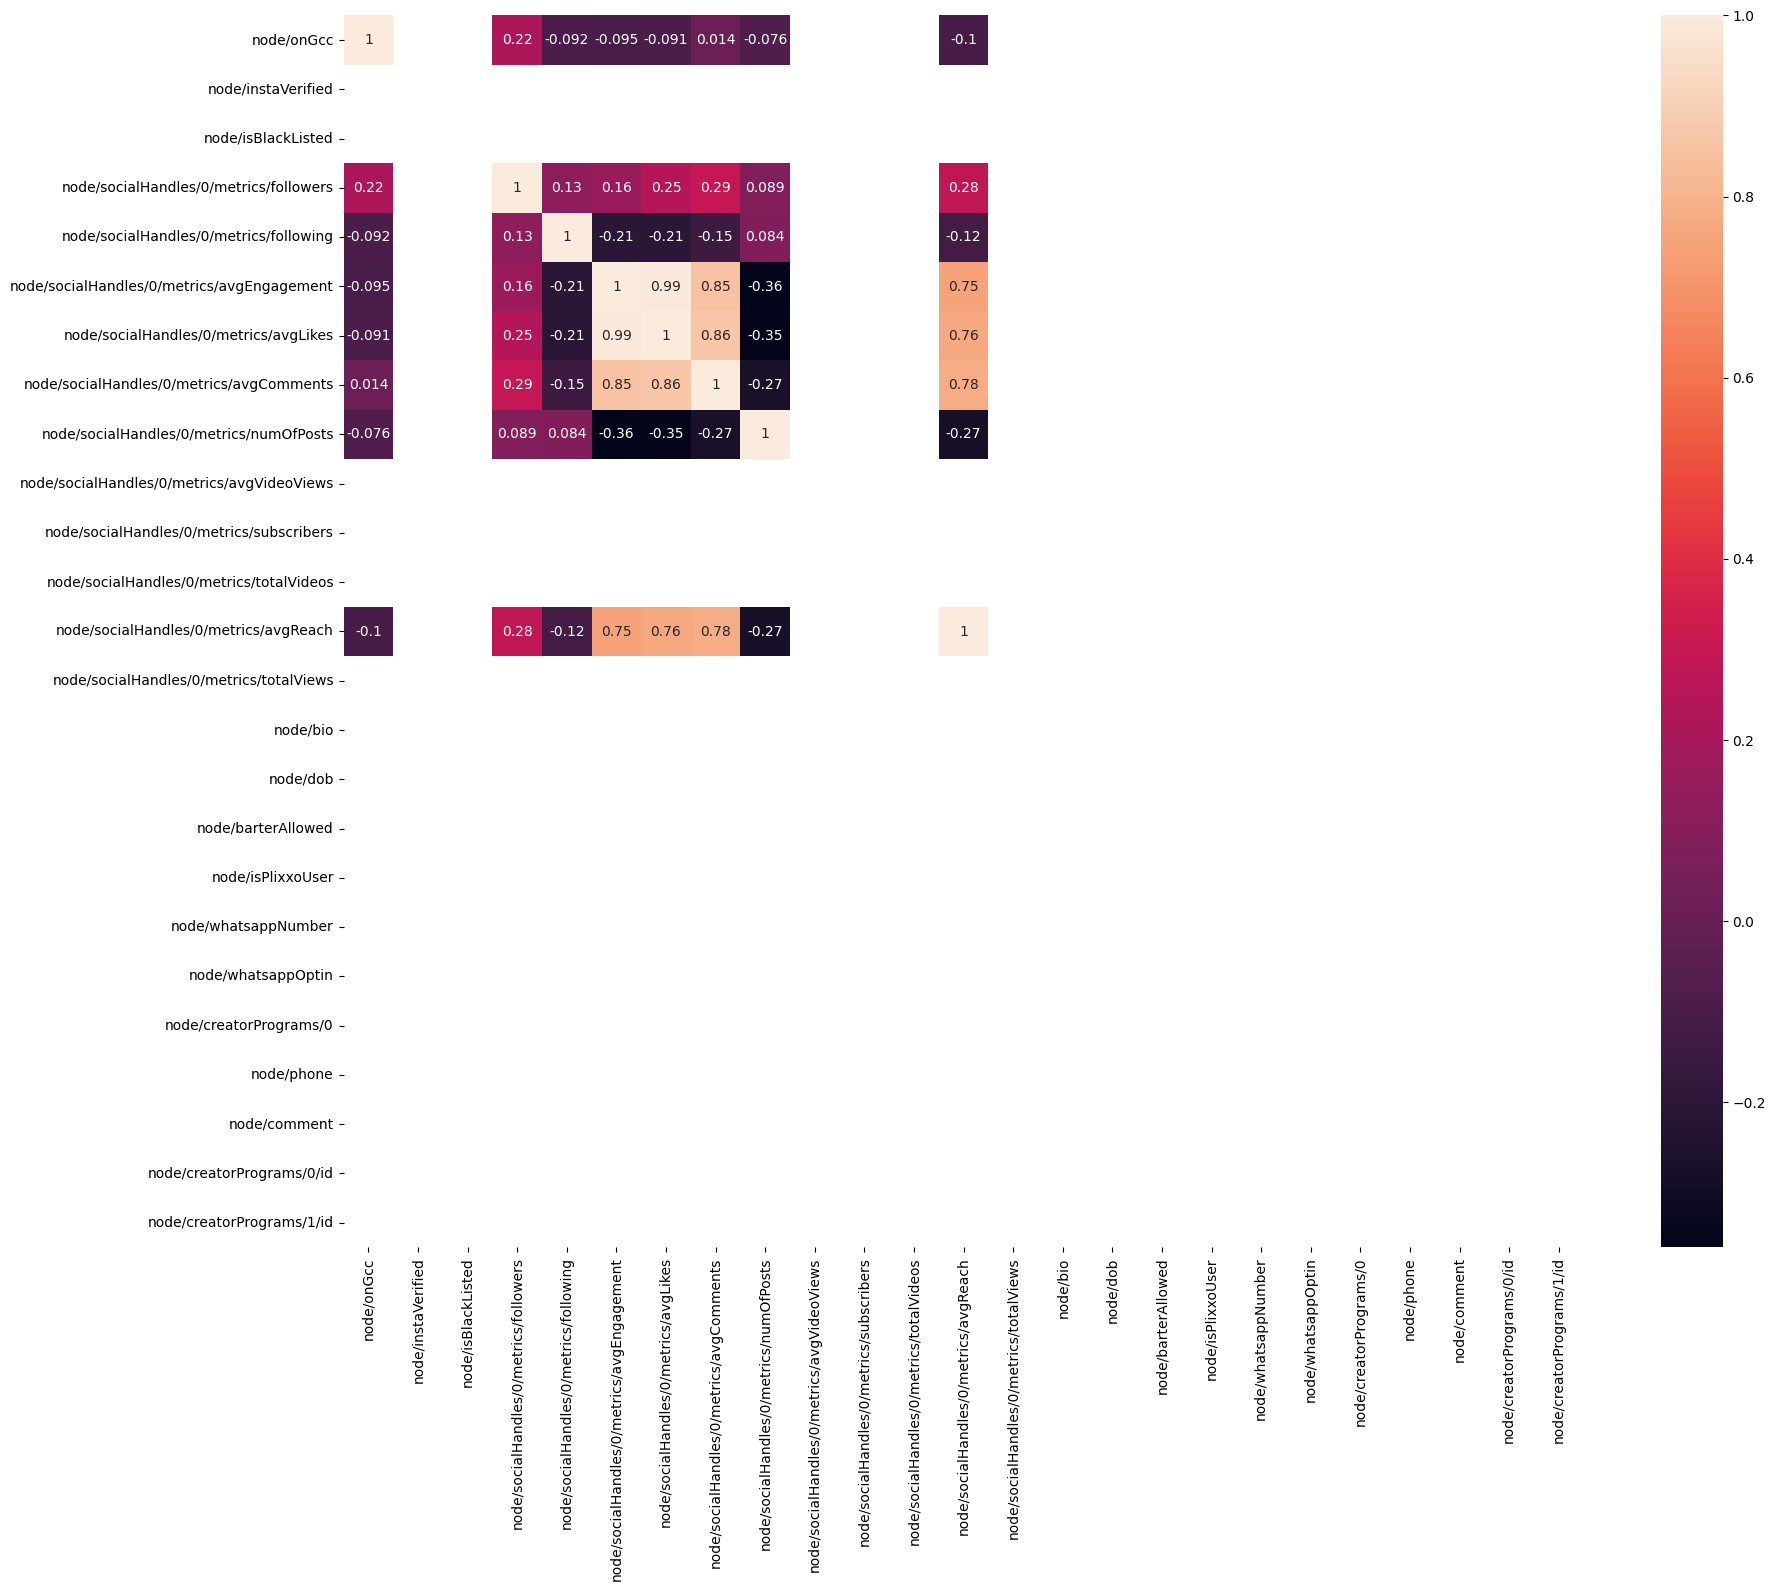

In [119]:
#lets plot it using heatmap
plt.figure(figsize = (20,16))
sns.heatmap(data.corr(), annot = True)

In [120]:
df

,id,onGcc,instaVerified,isBlackListed,name,platform,handle,url,followers,following,avgEngagement,avgLikes,avgComments,numOfPosts,avgReach,label,barterAllowed,isPlixxoUser,profilepicture,price
0,IG_316056,False,False,False,camila,INSTAGRAM,camila_cabello,https://www.instagram.com/camila_cabello,33343771,1273,1.19,755833.75,3201.63,2901.0,3958736.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
1,IG_291408,False,False,False,BTS official,INSTAGRAM,bts.bighitofficial,https://www.instagram.com/bts.bighitofficial,33359683,11,3.97,2567624.86,15678.57,1041.0,13495868.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,230000
2,IG_294144,False,False,False,Raffi Ahmad and Nagita Slavina,INSTAGRAM,raffinagita1717,https://www.instagram.com/raffinagita1717,33361889,5368,0.22,136905.96,875.75,9861.0,2497582.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,230000
3,IG_316618,False,False,False,JISOO🤍,INSTAGRAM,sooyaaa__,https://www.instagram.com/sooyaaa__,33441791,0,7.41,4509301.88,42542.00,856.0,23615715.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
4,IG_117707,False,False,False,Will Smith,INSTAGRAM,willsmith,https://www.instagram.com/willsmith,33450698,208,4.05,2580852.89,29533.61,1367.0,60444668.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,IG_513230,False,False,False,BMW,INSTAGRAM,bmw,https://www.instagram.com/bmw,63826245,73,0.24,80322.89,365.75,9164.0,800888.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000
146,IG_268841,False,False,False,Dan Bilzerian,INSTAGRAM,danbilzerian,https://www.instagram.com/danbilzerian,63863628,420,6.32,2099889.90,12678.70,1373.0,31090458.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000
147,IG_16034,False,False,False,Sonam Kapoor Ahuja,INSTAGRAM,sonamkapoor,https://www.instagram.com/sonamkapoor,63972386,3273,0.54,178814.11,900.82,4812.0,4303510.0,CELEB,False,False,https://cdn.vidooly.com/images/instagram/profi...,490000
148,IG_490450,False,False,False,Juliette,INSTAGRAM,juliette,https://www.instagram.com/juliette,65122707,1848,0.94,307225.21,9109.86,1044.0,3401302.0,CELEB,False,False,https://winkl-production.s3.amazonaws.com/Inst...,490000


In [121]:
new_df = df[['onGcc', 'instaVerified', 'isBlackListed','platform', 'followers', 'following', 'avgEngagement', 'avgLikes', 'avgComments', 'numOfPosts','label', 'avgReach','price']].copy()


In [122]:
new_df

,onGcc,instaVerified,isBlackListed,platform,followers,following,avgEngagement,avgLikes,avgComments,numOfPosts,label,avgReach,price
0,False,False,False,INSTAGRAM,33343771,1273,1.19,755833.75,3201.63,2901.0,CELEB,3958736.0,230000
1,False,False,False,INSTAGRAM,33359683,11,3.97,2567624.86,15678.57,1041.0,CELEB,13495868.0,230000
2,False,False,False,INSTAGRAM,33361889,5368,0.22,136905.96,875.75,9861.0,CELEB,2497582.0,230000
3,False,False,False,INSTAGRAM,33441791,0,7.41,4509301.88,42542.00,856.0,CELEB,23615715.0,230000
4,False,False,False,INSTAGRAM,33450698,208,4.05,2580852.89,29533.61,1367.0,CELEB,60444668.0,230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,False,False,INSTAGRAM,63826245,73,0.24,80322.89,365.75,9164.0,CELEB,800888.0,490000
146,False,False,False,INSTAGRAM,63863628,420,6.32,2099889.90,12678.70,1373.0,CELEB,31090458.0,490000
147,False,False,False,INSTAGRAM,63972386,3273,0.54,178814.11,900.82,4812.0,CELEB,4303510.0,490000
148,False,False,False,INSTAGRAM,65122707,1848,0.94,307225.21,9109.86,1044.0,CELEB,3401302.0,490000


In [123]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
new_df.onGcc= le.fit_transform(new_df.onGcc)
new_df.instaVerified= le.fit_transform(new_df.instaVerified)
new_df.isBlackListed= le.fit_transform(new_df.isBlackListed)
new_df.platform= le.fit_transform(new_df.platform)
new_df.label= le.fit_transform(new_df.label)

In [124]:
new_df

,onGcc,instaVerified,isBlackListed,platform,followers,following,avgEngagement,avgLikes,avgComments,numOfPosts,label,avgReach,price
0,0,0,0,0,33343771,1273,1.19,755833.75,3201.63,2901.0,0,3958736.0,230000
1,0,0,0,0,33359683,11,3.97,2567624.86,15678.57,1041.0,0,13495868.0,230000
2,0,0,0,0,33361889,5368,0.22,136905.96,875.75,9861.0,0,2497582.0,230000
3,0,0,0,0,33441791,0,7.41,4509301.88,42542.00,856.0,0,23615715.0,230000
4,0,0,0,0,33450698,208,4.05,2580852.89,29533.61,1367.0,0,60444668.0,230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,63826245,73,0.24,80322.89,365.75,9164.0,0,800888.0,490000
146,0,0,0,0,63863628,420,6.32,2099889.90,12678.70,1373.0,0,31090458.0,490000
147,0,0,0,0,63972386,3273,0.54,178814.11,900.82,4812.0,0,4303510.0,490000
148,0,0,0,0,65122707,1848,0.94,307225.21,9109.86,1044.0,0,3401302.0,490000


In [125]:
df['platform'].value_counts()

INSTAGRAM    148
Name: platform, dtype: int64

In [126]:
df['label'].value_counts()

CELEB    148
Name: label, dtype: int64

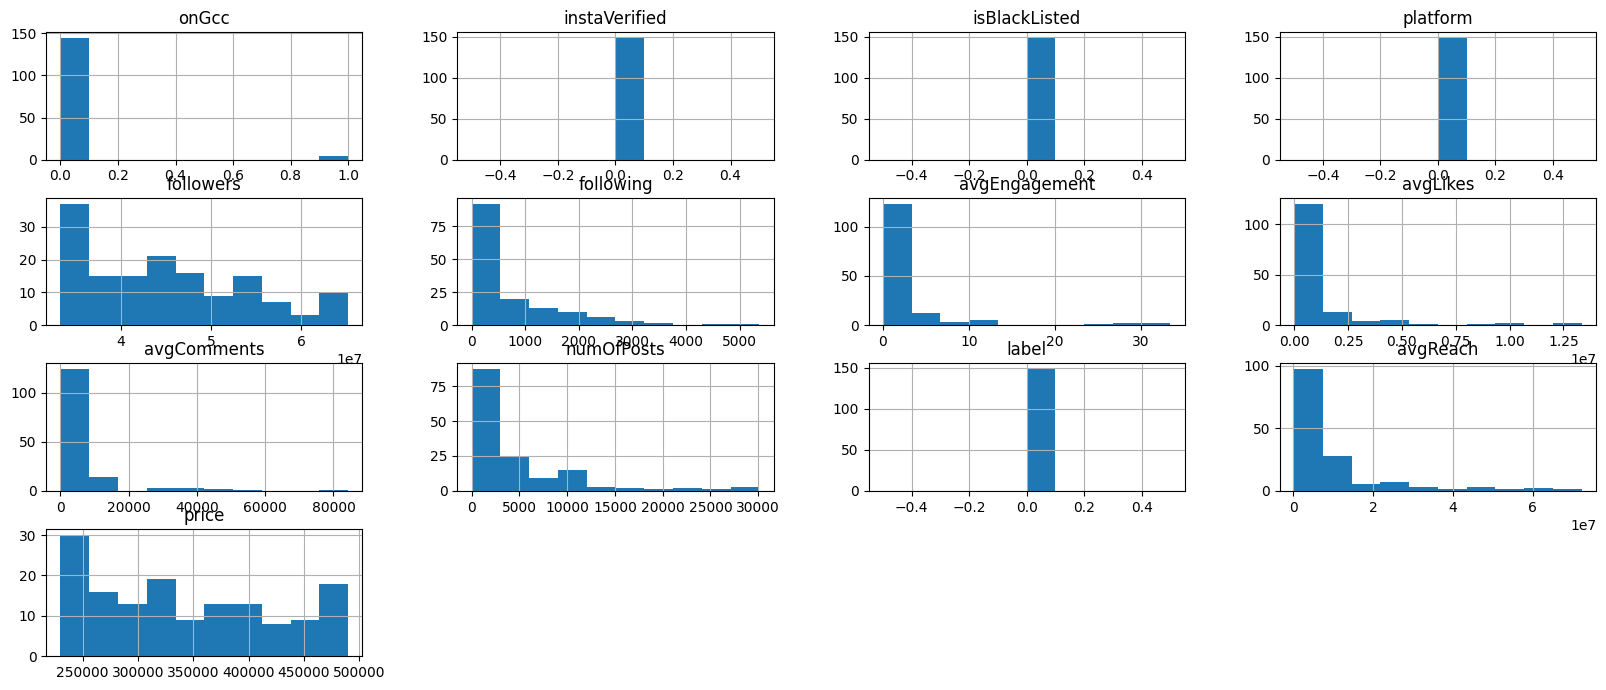

In [127]:
#drawing histogram for the data
new_df.hist(figsize=[20,8])
plt.subplots_adjust(bottom = 0.10)
plt.show()

In [128]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
onGcc,148.0,2.702703e-02,1.627128e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.00
instaVerified,148.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.00
isBlackListed,148.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.00
platform,148.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.00
followers,148.0,4.495575e+07,8.916693e+06,33343771.0,3.653661e+07,4.353564e+07,5.188487e+07,65163852.00
following,148.0,7.167027e+02,9.413279e+02,0.0,7.025000e+01,3.225000e+02,1.032750e+03,5368.00
avgEngagement,148.0,2.694932e+00,5.505390e+00,0.0,3.975000e-01,1.025000e+00,2.487500e+00,33.49
avgLikes,148.0,1.133339e+06,2.153102e+06,-1.0,1.908589e+05,4.156250e+05,9.373051e+05,13352842.00
avgComments,148.0,5.922713e+03,1.120270e+04,0.0,8.683450e+02,2.399900e+03,5.450302e+03,84269.75
numOfPosts,148.0,4.480784e+03,5.921819e+03,18.0,8.480000e+02,2.087000e+03,5.350750e+03,30108.00


In [129]:
#In machine learning outlier detection is most important for building an accutate model to get good results
#lets create a function that deals with checking outliers
def plotingvariables(df, column):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[column], alpha = 0.5)
    plt.title(column)

    plt.subplot(1,2,2)
    plt.boxplot(df[column])
    plt.show()

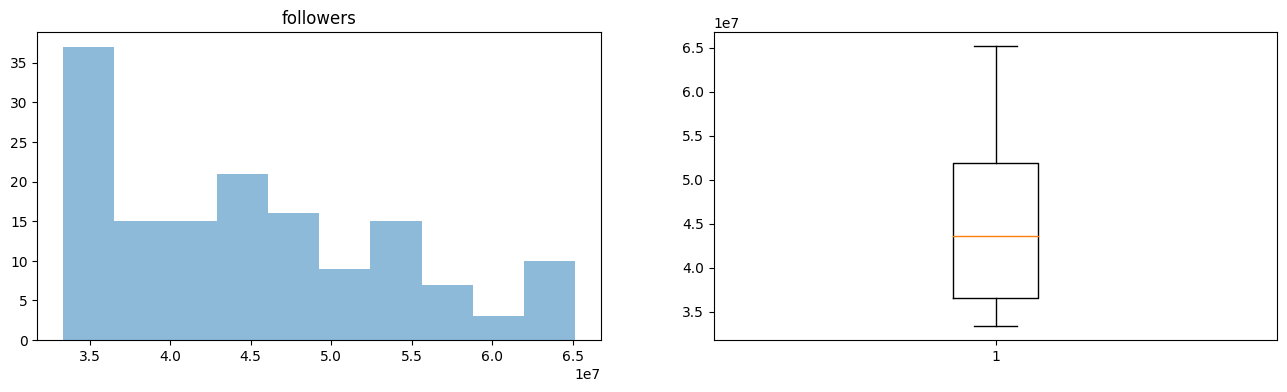

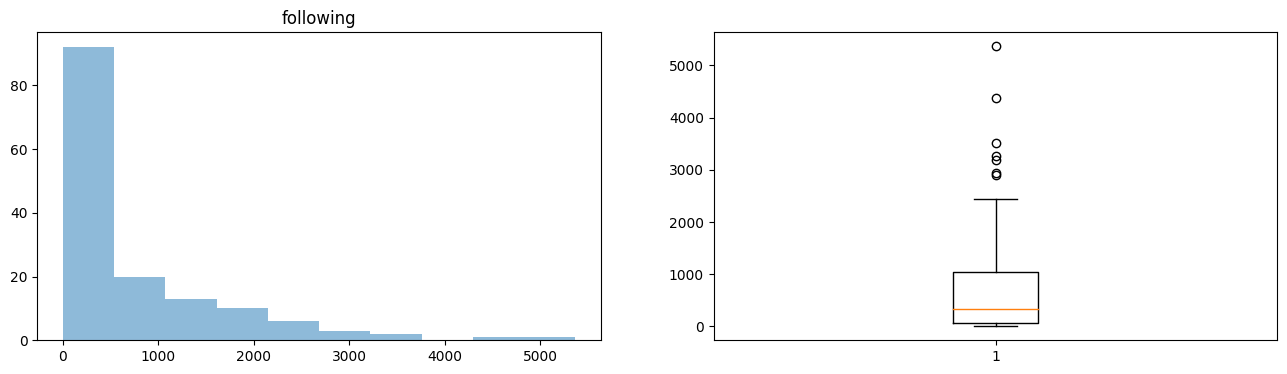

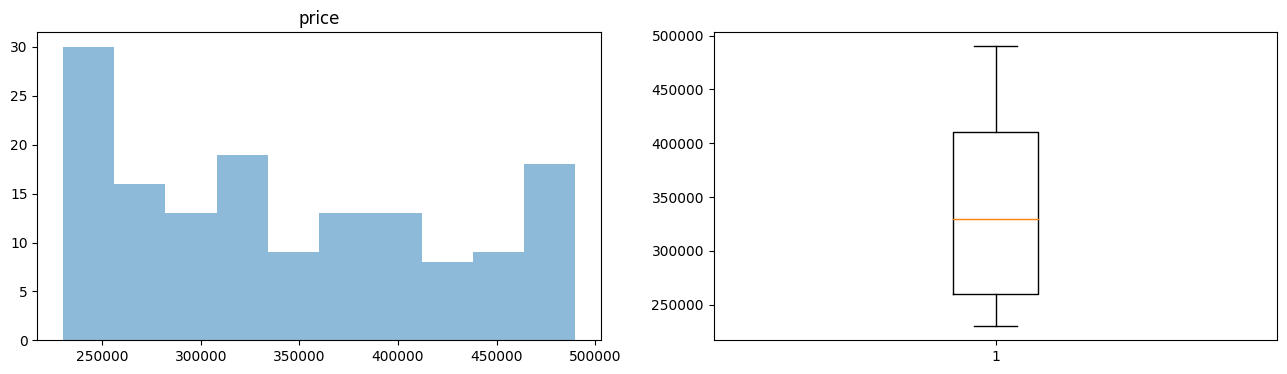

In [130]:
#creating the boxplots for the data
for i in num_cols:
    plotingvariables(new_df, i)


In [131]:
new_df

,onGcc,instaVerified,isBlackListed,platform,followers,following,avgEngagement,avgLikes,avgComments,numOfPosts,label,avgReach,price
0,0,0,0,0,33343771,1273,1.19,755833.75,3201.63,2901.0,0,3958736.0,230000
1,0,0,0,0,33359683,11,3.97,2567624.86,15678.57,1041.0,0,13495868.0,230000
2,0,0,0,0,33361889,5368,0.22,136905.96,875.75,9861.0,0,2497582.0,230000
3,0,0,0,0,33441791,0,7.41,4509301.88,42542.00,856.0,0,23615715.0,230000
4,0,0,0,0,33450698,208,4.05,2580852.89,29533.61,1367.0,0,60444668.0,230000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,63826245,73,0.24,80322.89,365.75,9164.0,0,800888.0,490000
146,0,0,0,0,63863628,420,6.32,2099889.90,12678.70,1373.0,0,31090458.0,490000
147,0,0,0,0,63972386,3273,0.54,178814.11,900.82,4812.0,0,4303510.0,490000
148,0,0,0,0,65122707,1848,0.94,307225.21,9109.86,1044.0,0,3401302.0,490000


In [132]:
new_df.skew()

onGcc            5.893231
instaVerified    0.000000
isBlackListed    0.000000
platform         0.000000
followers        0.544113
following        2.055081
avgEngagement    4.020220
avgLikes         3.727777
avgComments      4.011445
numOfPosts       2.313379
label            0.000000
avgReach         2.755131
price            0.359602
dtype: float64

<AxesSubplot:ylabel='Density'>

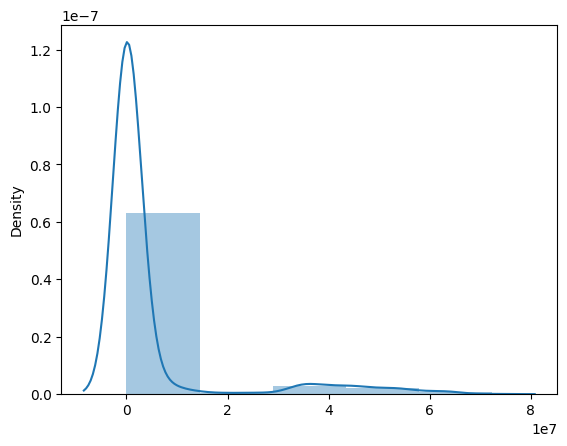

In [133]:
sns.distplot(new_df, bins= 5)

In [134]:
#seperating independent variables and target variable
x = new_df.drop(["price"], axis = 1)
y = new_df["price"]
print(x.shape,y.shape)

(148, 12) (148,)


In [135]:
#using robust scaler
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
new = pd.DataFrame(scalar.fit_transform(x), columns=x.columns)
x = new

In [136]:
#now lets standardize the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
new_x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x = new_x

In [137]:
#lets check the skewness and applying power transform
from sklearn.preprocessing import power_transform
data_x = pd.DataFrame(power_transform(x, method = 'yeo-johnson'), columns= x.columns)
x = data_x

<AxesSubplot:ylabel='Density'>

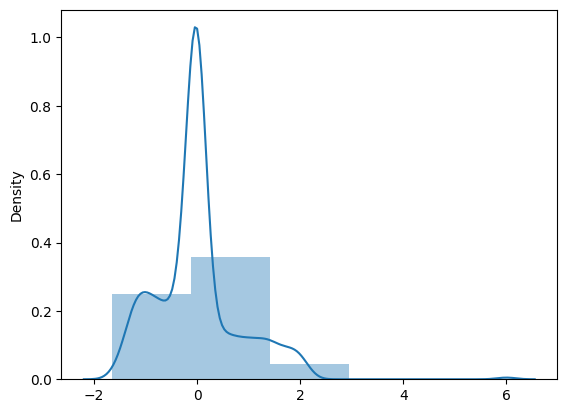

In [138]:
sns.distplot(x, bins= 5)

In [139]:
x.skew()

onGcc            5.893231
instaVerified    0.000000
isBlackListed    0.000000
platform         0.000000
followers        0.105309
following        0.392325
avgEngagement    0.615336
avgLikes         0.585899
avgComments      0.511214
numOfPosts       0.387974
label            0.000000
avgReach         0.407324
dtype: float64

In [140]:
#Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 100)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(99, 12) (99,) (49, 12) (49,)


In [141]:
#now checking the cross_val_score of models to get the best model 
models = []
models.append(('LR', LinearRegression()))
models.append(('L', Lasso()))
models.append(('R', Ridge()))
models.append(('DEC', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVC', SVR()))
models.append(('RAN', RandomForestRegressor()))
models.append(('ADA', AdaBoostRegressor()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=100, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.981688, 0.009924
L: 0.981682, 0.009923
R: 0.980287, 0.010362
DEC: 0.994404, 0.004758
KNN: 0.806260, 0.177464
SVC: -0.162128, 0.216840
RAN: 0.997857, 0.001984
ADA: 0.989987, 0.014785


In [142]:
#Loading the instances models
lr = LinearRegression()
l = Lasso()
r = Ridge()
dec = DecisionTreeRegressor()
knn = KNeighborsRegressor()
svc = SVR()
ran = RandomForestRegressor()
ada = AdaBoostRegressor()

In [143]:
#creating a list of models
model = []
model.append(('LinearRegression', LinearRegression()))
model.append(('Lasso', Lasso()))
model.append(('ridge', Ridge()))
model.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
model.append(('KNeighborsRegressor', KNeighborsRegressor()))
model.append(('SVR', SVR()))
model.append(('RandomForestRegressor', RandomForestRegressor()))
model.append(('AdaBoostRegressor', AdaBoostRegressor()))

score of  LinearRegression is: 98.7085557416587
r2 score is : 0.9847669690565282
MSE : 106779676.79758763
MAE : 7850.715790465397
RMSE: 10333.4252209801




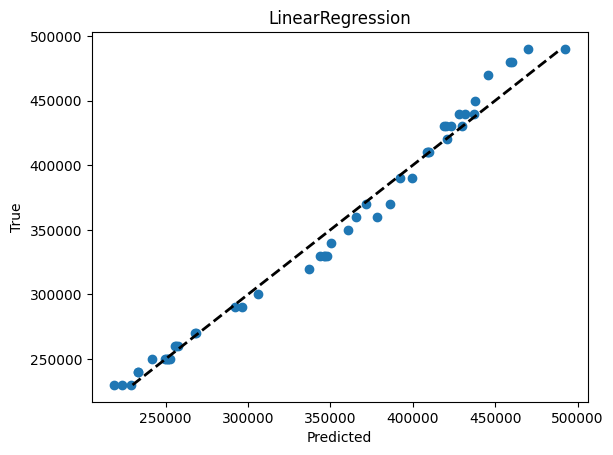

score of  Lasso is: 98.70853651898807
r2 score is : 0.9847712065866938
MSE : 106749972.78771691
MAE : 7849.5595581908865
RMSE: 10331.98784299115




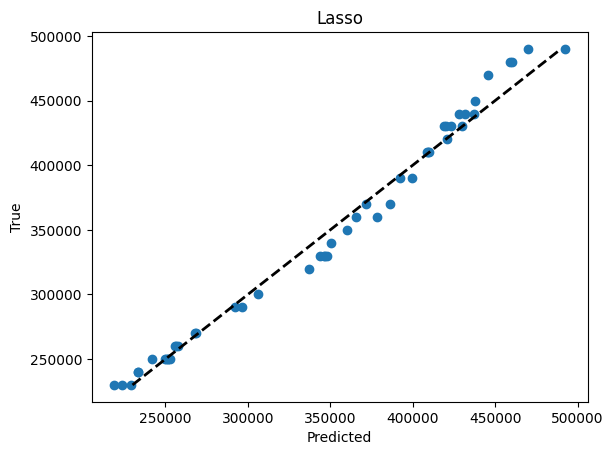

score of  ridge is: 98.63993856043821
r2 score is : 0.9838152747920211
MSE : 113450811.80356865
MAE : 8037.595803860858
RMSE: 10651.32910972




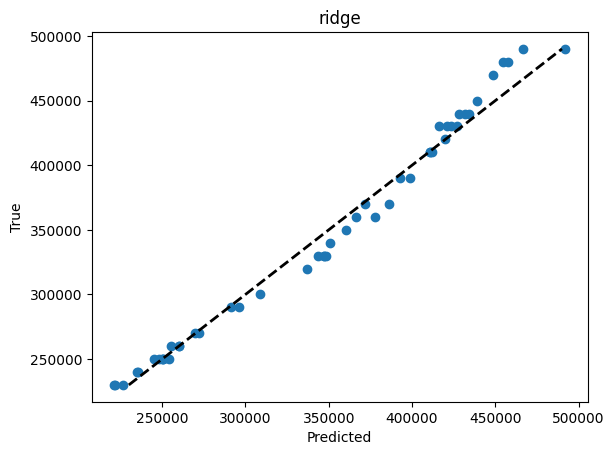

score of  DecisionTreeRegressor is: 100.0
r2 score is : 0.9962151820515258
MSE : 26530612.244897958
MAE : 2244.8979591836733
RMSE: 5150.787536377127




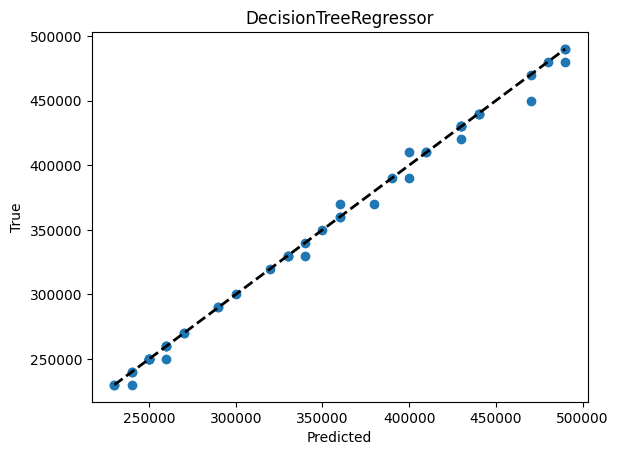

score of  KNeighborsRegressor is: 90.59700385991339
r2 score is : 0.8356923186614698
MSE : 1151755102.0408163
MAE : 24122.448979591838
RMSE: 33937.517617539685




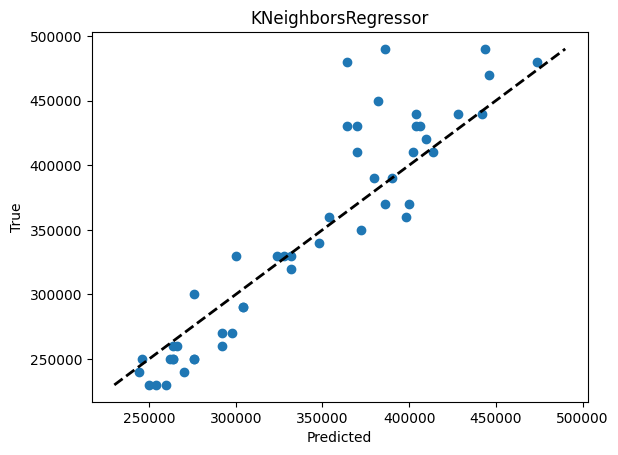

score of  SVR is: -5.465841031598773
r2 score is : -0.10182235048693089
MSE : 7723494747.036752
MAE : 76117.26600345281
RMSE: 87883.41565413096




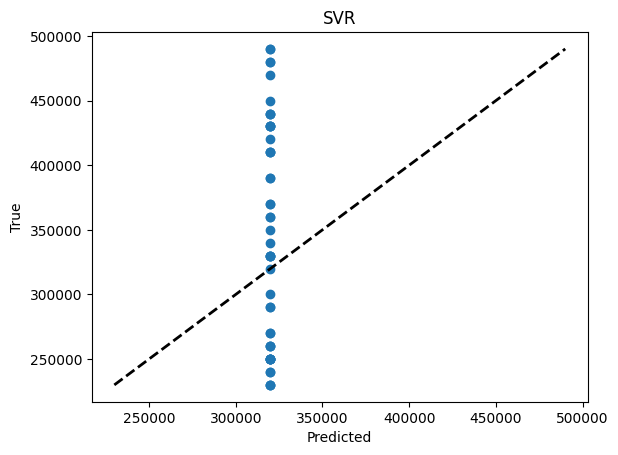

score of  RandomForestRegressor is: 99.97906869292507
r2 score is : 0.996727355261907
MSE : 22940408.163265307
MAE : 3073.469387755102
RMSE: 4789.614615317741




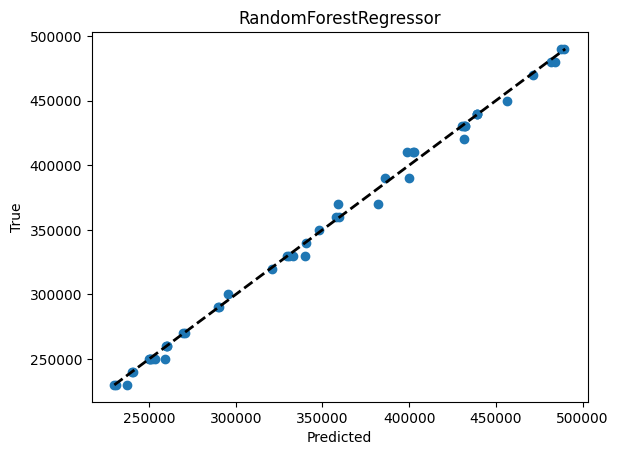

score of  AdaBoostRegressor is: 99.45680605367869
r2 score is : 0.9894448983577597
MSE : 73988580.8744522
MAE : 6801.8611207386775
RMSE: 8601.661518244728




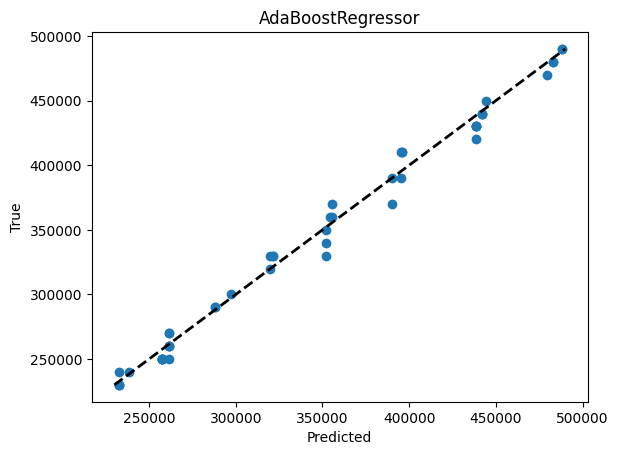

In [144]:
#creating a loop for predicting the data
for n, m in model:
    m.fit(x_train,y_train)
    print("score of ",n,"is:", m.score(x_train,y_train)*100)
    predm = m.predict(x_test)
    #metrics for evaluating regression
    print("r2 score is :", r2_score(y_test, predm))
    print("MSE :",mean_squared_error(y_test, predm))
    print("MAE :",mean_absolute_error(y_test, predm))
    print("RMSE:", sqrt(mean_squared_error(y_test, predm)))
    print("\n")
    #plotting regression plot
    plt.scatter(predm, y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.title(n)
    plt.show()

In [145]:
#setting parameters for gridsearch_cv
random_params = {
    
    'n_estimators': [10, 20 ,30, 100],
    'max_depth': [10, 20, 30, 40, 50, 60]
    
}

In [146]:
grid1 = GridSearchCV(RandomForestRegressor(), random_params, cv = 5)
grid1.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60],
                         'n_estimators': [10, 20, 30, 100]})

In [147]:
grid1.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [148]:
Randomforest_prediction = grid1.predict(x_test)
print(grid1.score(x_train,y_train))
print(Randomforest_prediction)
print("r2 score is :", r2_score(y_test, Randomforest_prediction))
print("MSE :",mean_squared_error(y_test, Randomforest_prediction))
print("MAE :",mean_absolute_error(y_test, Randomforest_prediction))
print("RMSE:",sqrt(mean_squared_error(y_test, Randomforest_prediction)))

0.9998140458776595
[333500. 251100. 238200. 440200. 290500. 401100. 470200. 289900. 259700.
 457200. 271600. 240000. 385100. 440300. 385400. 488400. 269200. 401700.
 489400. 399800. 439000. 259100. 252500. 360100. 430300. 341900. 240300.
 320300. 358000. 359800. 432000. 336300. 348700. 486700. 481900. 433300.
 330200. 259500. 230200. 250600. 249500. 230800. 250700. 260400. 297400.
 432100. 397300. 432500. 341500.]
r2 score is : 0.9961265590835631
MSE : 27151836.734693877
MAE : 3326.530612244898
RMSE: 5210.7424360347995


In [149]:
import joblib

In [150]:
#saving our model
joblib.dump(ran, "Randommodel.pkl")

['Randommodel.pkl']

In [151]:
model1 = joblib.load("Randommodel.pkl")


In [152]:
#Loading and predicting the test data
a = np.array(y_test)
ran.fit(x_train,y_train)
predicted = np.array(ran.predict(x_test))
submission = pd.DataFrame({"original" : a, "predicted" : predicted})

In [153]:
submission

,original,predicted
0,330000,332600.0
1,250000,251600.0
2,230000,237300.0
3,440000,440400.0
4,290000,290300.0
5,410000,399500.0
6,470000,472200.0
7,290000,289800.0
8,260000,260400.0
9,450000,453300.0


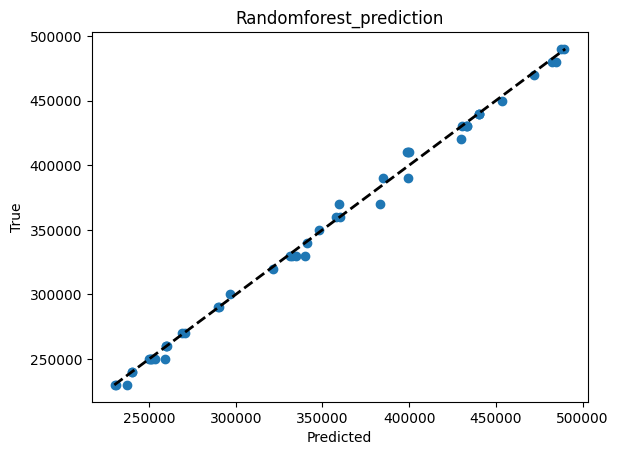

In [154]:
plt.scatter(predicted, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Randomforest_prediction")
plt.show()